# Analyse des données Twitter

La stratégie suit généralement des étapes similaires :

- récupération des données
- nettoyage et consolidation des données (data management)
- construction des réseaux
- explorations, visualisations et statistiques

Par contre la question principale est  : qu'est-ce que l'on veut étudier ? 

- un phénomène spécifique sur la plateforme : morphologie, évolution, etc.
- des dynamiques (corrélations entre certains comportements et éléments)
- d'autres phénomènes en prenant les interactions comme proxy : attitudes


## 1. Collecter les données

In this case, I use `twarc` with commandline. Others options exist, for instance as a librairy.

To use `twarc` : https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/

## 2 - Consolider les données

Pour l'exploration, utilisons `Pandas`

In [33]:
import pandas as pd

Chargeons les données

In [35]:
data = pd.read_csv("../data/tweets_aiORartificial_FULL.csv", 
                    low_memory=False)
data.shape

(208386, 83)

In [36]:
data.head()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version
0,1621090140209938432,1621090140209938432,NaN,NaN,1.621032e+18,98652139,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-02T10:22:42+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
1,1621073114154270720,1621073114154270720,NaN,1.620031e+18,NaN,2602152509,NaN,NaN,1.045620e+18,V7Labs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-02T10:22:42+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
2,1621056195254517762,1621056195254517762,NaN,NaN,NaN,499643239,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-02T10:22:42+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
3,1621024454204854272,1621024454204854272,NaN,1.620952e+18,NaN,290980590,NaN,NaN,1.844873e+07,james_goldfarb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-02T10:22:42+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
4,1621024442632605697,1621024442632605697,NaN,1.620952e+18,NaN,290980590,NaN,NaN,3.402698e+09,DrDreMDPhD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-02T10:22:42+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0


In [37]:
data.columns

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'in_reply_to_username',
       'retweeted_user_id', 'retweeted_username', 'quoted_user_id',
       'quoted_username', 'created_at', 'text', 'lang', 'source',
       'public_metrics.impression_count', 'public_metrics.reply_count',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.like_count', 'reply_settings', 'edit_history_tweet_ids',
       'edit_controls.edits_remaining', 'edit_controls.editable_until',
       'edit_controls.is_edit_eligible', 'possibly_sensitive',
       'withheld.scope', 'withheld.copyright', 'withheld.country_codes',
       'entities.annotations', 'entities.cashtags', 'entities.hashtags',
       'entities.mentions', 'entities.urls', 'context_annotations',
       'attachments.media', 'attachments.media_keys',
       'attachments.poll.duration_mi

Garder uniquement les tweets originaux

In [38]:
filtre = pd.isnull(data["retweeted_user_id"]) & pd.isnull(data["quoted_user_id"]) 

In [39]:
filtre.sum()

69810

#### Evolution temporelle

In [40]:
data["date"] = pd.to_datetime(data['created_at'])
data["num"] = 1

Visualisation

<AxesSubplot:xlabel='date'>

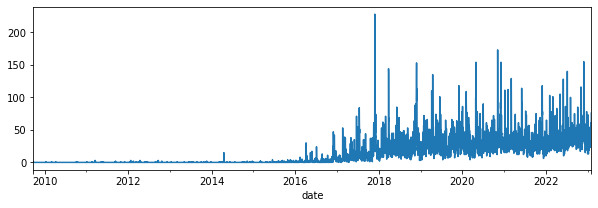

In [42]:
data[filtre].set_index("date")["num"].resample("d").sum().plot(figsize=(10,3))

Explorer les bursts ?

Regarder des tweets particuliers

In [43]:
import requests
class Tweet(object):
    """
    Object to visualize a specific tweet
    """
    def __init__(self, s):
        """
        s : id of a tweet
        """
        s = f"https://twitter.com/OReillyMedia/status/{s}"
        api = 'https://publish.twitter.com/oembed?url={}'.format(s)
        response = requests.get(api)
        self.text = response.json()["html"]

    def _repr_html_(self):
        return self.text

In [44]:
Tweet(data.iloc[1000]["id"])

#### La langue des tweets

In [45]:
data['lang'].value_counts().head()

en     200966
fr       1485
es       1295
qme       692
und       521
Name: lang, dtype: int64

We can check it is a French thing : https://trends.google.com/trends/explore?q=lancetgate

Uniquement les tweets français

In [46]:
data = data[data['lang']=="en"]

In [47]:
len(data)

200966

#### Les principaux comptes

In [50]:
data['author.username'].value_counts()

JohnLaprise        9860
Radiology_AI       4131
VonRosenchild      3814
libkey_io          3733
RadiologyGamuts    3490
                   ... 
usbiomat              1
HenrikH12577233       1
Dr_subhro             1
ashwin_vaswani        1
acosand               1
Name: author.username, Length: 37377, dtype: int64

Number of users

In [51]:
len(data['author.username'].unique())

37377

<AxesSubplot:>

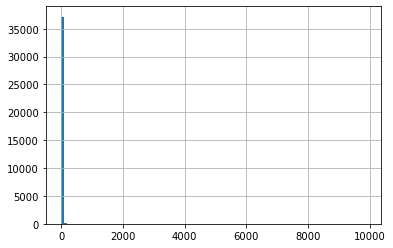

In [52]:
data['author.username'].value_counts().hist(bins=100)

#### Les tweets les plus visibles

In [53]:
data[["id",'public_metrics.retweet_count']].sort_values('public_metrics.retweet_count',
                                                        ascending=False)

,id,public_metrics.retweet_count
79293,1377625185264762883,581
80589,1373754369544495104,581
77945,1380575008158810113,581
77941,1380590021313462272,581
77931,1380635576395784199,581
...,...,...
121986,1234599714449833985,0
121987,1234598429747228673,0
121988,1234597412276199424,0
121989,1234597258571718656,0


In [56]:
Tweet(1380590021313462272)

### Extract hashtags

Add a new column in the dataframe with the list of hashtags for each tweet

(in this case, the metadata are not very friendly)

In [37]:
import re # standard module for regular expression

def extract_hashtags(text):
    """
    function to extract hashtags in a text
    """
    return re.findall("(#\w+)", text.lower())

In [38]:
extract_hashtags("it is a sentence with an #hashtag")

['#hashtag']

In [39]:
data["hashtags"] = data['text'].str.lower().apply(extract_hashtags)

In [40]:
data["hashtags"]

0                                             [#lancetgate]
5                                                        []
6                                             [#lancetgate]
7                                      [#fact, #lancetgate]
8                                                        []
                                ...                        
135775    [#hydroxychloroquine, #lancetgate, #didier_rao...
135776    [#hydroxychloroquine, #lancetgate, #didier_rao...
135777    [#hydroxychloroquine, #lancetgate, #didier_rao...
135778    [#ggrmc, #covidー19, #lancet, #raoult, #lancetg...
135779    [#bigpharma, #chloroquine, #remdesevir, #lance...
Name: hashtags, Length: 107930, dtype: object

## Step 3 : Creating networks

The idea is to create networks to be analyzed in an other software

In [13]:
from itertools import combinations # create combinations of a set

#pip install network
import networkx as nx # library for network analysis in python

### Non directed retweet

I want to create a network with the properties :

- A node is created if a user tweet or retweet. If the user exist, I want to increase by one a parameter weight
- A link is created if a user retweet another one

To create the network

1. Create a graph empty
2. I make a loop on all the tweets
3. For each tweet, in create node/edge

In [43]:
network = nx.Graph()

In [52]:
# create an empty network
network_retweets = nx.Graph()

# A loop for each tweet of my dataset
for i, line in data.iterrows():
    
    # name of the user of the tweet
    user = str(line["author.username"])
    
    # is the user already in my network
    if not user in network_retweets.nodes:
        # if not, we add it with a weight of 1
        network_retweets.add_node(user, label=user, weight=1)
    else:
        # if yes, i only increase its weight
        network_retweets.nodes[user]["weight"] += 1    

    # if the tweet is a retweet
    if pd.notnull(line["retweeted_username"]):

        # the name of the user retweeted
        reweet_user = str(line["retweeted_username"])
        
        # if the retweeted user is not in the network
        if not reweet_user in network_retweets.nodes:
            # create a node
            network_retweets.add_node(reweet_user, label=reweet_user, weight=1)
        else:
            # increase the node
            network_retweets.nodes[reweet_user]["weight"] += 1  

        # if there is a retweet
        if pd.notnull(reweet_user):
            
            # if the edge between retweeted user and retweeting user not exist
            if not network_retweets.has_edge(user, reweet_user):
                # creating the edge
                network_retweets.add_edge(user, reweet_user, weight=1)
            else:
                # increasing its weight
                network_retweets[user][reweet_user]["weight"] += 1 

In [53]:
len(network_retweets.edges)

71560

In [54]:
len(network_retweets.nodes)

29186

Export it as a file we can open on Gephi

In [55]:
nx.write_graphml(network_retweets,"./graph_retweets_lancetgate.graphml")

### hashtags

- 1-mode network
- 2 hashtags connected if mentionned in the same tweet

In [56]:
# empty network
network_hashtags = nx.Graph()

# every tweets
for i, line in data.iterrows():
    
    # adding the nodes
    for e in line["hashtags"]:
        if not e in network_hashtags.nodes:
            network_hashtags.add_node(e, label=e, weight=1)
        else:
            network_hashtags.nodes[e]["weight"] += 1
    
    # adding the edges (all combinations)
    for i, j in combinations(line["hashtags"], 2): 
        if not network_hashtags.has_edge(i, j):
            network_hashtags.add_edge(i, j, weight=1)
        else:
            network_hashtags[i][j]["weight"] += 1

In [57]:
print(len(network_hashtags))

2213


In [58]:
len(network_hashtags.edges)

13786

In [59]:
nx.write_graphml(network_hashtags,"./graph_hashtags_lancetgate.graphml")

## Step 4 : First visualisation

We can try do to dit directly in Python with dedicated tools

In [12]:
from ipysigma import Sigma

In [61]:
Sigma(network_retweets, node_size="weight")

Sigma(nx.Graph with 29,186 nodes and 71,560 edges)

In [62]:
Sigma(network_hashtags, node_size="weight")

Sigma(nx.Graph with 2,213 nodes and 13,786 edges)

Its huge networks, and the visualisation is not the best. We would like to simply them.

- remove the central node
- clustering

Or we can move to a dedicated software : Gephi

In [134]:
nx.write_graphml(network_retweets,"network_retweets.graphml")

## Step 5 : Statistics on the network

In [63]:
network_retweets

In [64]:
degrees = network_retweets.degree

<AxesSubplot:ylabel='Frequency'>

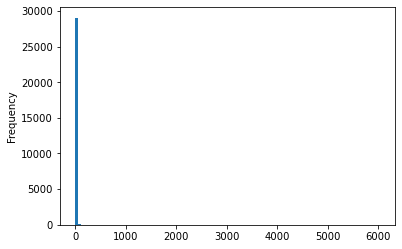

In [65]:
pd.DataFrame(list(degrees))[1].plot(kind="hist",bins=100)

In [66]:
nx.number_connected_components(network_retweets)

2234

Principal component

In [52]:
largest_cc = max(nx.connected_components(network_retweets), key=len)
len(largest_cc)

26743

Extract the component

In [53]:
largest_cc_network = nx.subgraph(network_retweets,largest_cc)

Write it for analysis with gephi

In [54]:
nx.write_graphml(largest_cc_network,"./graph_component_retweets_lancetgate.graphml")

Calculate the density

In [68]:
nx.density(network_retweets)

0.0001680219620388939

Calculate the closeness centrality (could take some time)

In [54]:
nx.closeness_centrality(largest_cc_network,u="raoult_didier")

0.40169809710726173

Find the maximal clique

In [55]:
r = nx.find_cliques(largest_cc_network)

In [58]:
r = [i for i in r]

In [61]:
r[1]

['PatracqSerge', 'andrebercoff']

## Step 6 : Add attributes / transform network

One the exploration is done, we have more specific question, and we will go back to data ...

- Transforming the network : for instance, filter, subsample, etc.
- Adding information : categories, polarities (sentiment analysis)

#### Focus on the core

We will extract only the 3-core of the main component

In [57]:
filtered_largest_cc_network = largest_cc_network.copy()

In [58]:
#remove self-loops
filtered_largest_cc_network.remove_edges_from(nx.selfloop_edges(filtered_largest_cc_network))

r = nx.k_core(filtered_largest_cc_network,k=3)

In [60]:
len(r.nodes),len(filtered_largest_cc_network.nodes)

(7323, 26743)

In [62]:
nx.write_graphml(r,"./graph_3core_component1_retweets_lancetgate.graphml")

#### Clustering

In [136]:
import networkx.algorithms.community as nx_comm 

clusters = nx_comm.louvain_communities(network_hashtags, seed=123, weight="weight")

In [145]:
pd.Series([len(i) for i in clusters]).value_counts()

1       78
2        5
3        4
4        4
10       3
7        3
11       3
12       2
8        2
5        2
51       1
139      1
80       1
1808     1
27       1
9        1
15       1
238      1
223      1
32       1
22       1
6        1
228      1
26       1
127      1
95       1
24       1
47       1
dtype: int64

Adding it to the network ? lets add a new class in each node, and the number of the class but only if there is at least 50 elements in it

nx.set_node_attributes(G, labels, "labels")

## Step 7 - Specific application of networks

Identify the long discussion on tweeter for qualitative use

There is a specific field "reply to" and "quoted" who allows to create a link between one reply/quote and the original tweet. To identify the most "replied" tweet we build a specific network.

- id
- referenced_tweets.replied_to.id
- referenced_tweets.quoted.id

In [10]:
data["referenced_tweets.quoted.id"].apply(lambda x: None if pd.isnull(x) else str(int(x)))

0                       None
1                       None
2                       None
3                       None
4                       None
                ...         
85437                   None
85438                   None
85439                   None
85440    1268795710163558400
85441                   None
Name: referenced_tweets.quoted.id, Length: 85442, dtype: object

In [15]:
discussion = nx.Graph()
for i,j in data.iterrows():
    if pd.notnull(j["referenced_tweets.replied_to.id"]):
        e = str(int(j["referenced_tweets.replied_to.id"]))
        if not e in discussion.nodes:
            discussion.add_node(e, label=e, weight=0)
        discussion.nodes[e]["weight"]+=1
        if not str(j["id"]) in discussion.nodes:
            discussion.add_node(str(j["id"]), label=str(j["id"]), weight=0)
        discussion.add_edge(str(j["id"]), e, weight=1,cat="rep")
        
    if pd.notnull(j["referenced_tweets.quoted.id"]):
        e = str(int(j["referenced_tweets.quoted.id"]))
        if not e in discussion.nodes:
            discussion.add_node(e, label=e, weight=0)
        discussion.nodes[e]["weight"]+=1
        if not str(j["id"]) in discussion.nodes:
            discussion.add_node(str(j["id"]), label=str(j["id"]), weight=0)
        discussion.add_edge(str(j["id"]), e, weight=1,cat="quo")

        

In [16]:
len(discussion.nodes),len(discussion.edges)

(24020, 12763)

In [17]:
nx.number_connected_components(discussion)

11260

In [18]:
comp = nx.connected_components(discussion)

In [19]:
comp = sorted(([i for i in comp]),key=len)

In [29]:
[len(i) for i in comp[-5:]]

[26, 31, 34, 84, 88]

In [31]:
Sigma(discussion.subgraph(comp[-3]),node_size="weight")

Sigma(nx.Graph with 34 nodes and 33 edges)

In [89]:
data[data["referenced_tweets.replied_to.id"]==1268231436932395008]["text"].iloc[0]

'@JamesTodaroMD This is not the first #LancetGate.\\n\\n@TheLancet chose to publish and later retracted the first supposedly peer-reviewed article linking vaccines to autism.'

In [32]:
Tweet(1272320358494814208)

## Go further


- directed networks of retweet ?
- links ?
- all words ?
- proximity with the bio of users ?
- can we get an information about the evolution of the network ? How ?
- **build the bimodal network tweets/user to better understand what are the most viral tweets**